In [68]:
import sys
sys.path.append("../")

import pandas as pd
import os
import statsmodels.formula.api as sm


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

from library import regulations
from library import analysis
from library import tables

In [69]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 'yr1415']
data = data[data.doi == True]

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [70]:
stubnames = sorted(
    set([match[0] for match in data.columns.str.findall(
    r'reg.*').values if match != [] ])
    )

In [71]:
proportion = []
number = []
for reg in stubnames:
    proportion.append(data[reg].mean())
    number.append(data[reg].sum())

In [72]:
regs = pd.DataFrame(
    {'law': stubnames,
     'proportion': proportion,
     'number': number
    }).sort_values(by = ['proportion'], ascending = False)
regs['label'] = regs['law'].map(regulations.labels)
regs.head(50)

,law,proportion,number,label
120,reg25_0811,0.901911,708.0,25.0811 - Minimum First Day of Instruction
38,reg21_003,0.738854,580.0,21.003 - Teacher Certification Required
134,reg25_112,0.431847,339.0,25.112 - Class Size Maximum
119,reg25_081,0.412739,324.0,25.081 - Minimum Minutes of Operation
60,reg21_102,0.384713,302.0,21.102 - Maximum Probationary Contract Length
135,reg25_113,0.363057,285.0,25.113 - Notice of Class Size
74,reg21_401,0.343949,270.0,21.401 - Minimum Service Days Required for Tea...
55,reg21_057,0.289172,227.0,21.057 - Notice of Uncertified Teacher
121,reg25_0812,0.287898,226.0,25.0812 - Minimum Last Day of Instruction
52,reg21_053,0.286624,225.0,21.053 - Presentation of Teacher Certificates


# Number of Exemptions

In [73]:
false_laws = ['11_255', '11_251', '21.044', '11.253', '25.084', '21.351', '39.054','11.255', '28.0821']
#regs_sm = regs.head(50)
#regs_sm = regs_sm[~regs_sm.law.isin(false_laws)]
stubnames = sorted(
    set([match[0] for match in data.columns.str.findall(
    r'reg.*').values if match != [] ])
    )
for false in false_laws:
    if false in stubnames:
        stubnames.remove(false)

In [74]:
data['num_regs'] = data[stubnames].sum(axis = 1)
data['num_regs'][data.num_regs < 54].mean()
num_regs = data[data.num_regs < 54]['num_regs']
num_regs.mean()
num_regs.std()

4.876199414886655

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


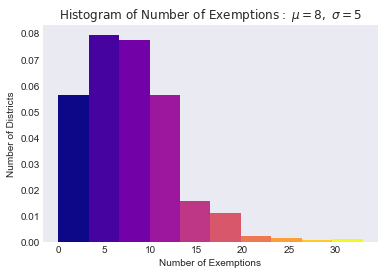

In [75]:
# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('plasma')

# Plot histogram.
n, bins, patches = plt.hist(num_regs, 10, normed=1, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
    
plt.xlabel('Number of Exemptions')
plt.ylabel('Number of Districts')
plt.title(r'$\mathrm{Histogram\ of\ Number\ of\ Exemptions:}\ \mu=8,\ \sigma=5$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(False)
plt.savefig(table_path + 'hist_num_exemptions.png', dpi = 600)


plt.show()